# Bit Hero 5 Final Project : An Exploratory Analysis on Flour Sisters Data

#### Members:
Alde, Julia  
Chong, Ria  
Domer, Tyrael  
Te, Hazelle  
Viola, Marjorie

#### Instructor:
Sir Joben Ilagan

#### Section:
ITMGT 25.03 Section J

### A Brief Context on the Business: 

Flour Sisters is an online bakeshop founded by four sisters united by their common passion for baking homemade pastries. The selection started with Classic Chocolate Chip Cookies, L.A. Cheese Cupcakes, and the ultimate bestseller, Ube Cheese pandesals with homemade Ube halaya. As the business expands, Flour Sisters decided to offer variants of cookies and pandesals for customers to choose from, namely, Almond White Chocolate and Reese’s Peanut Butter, and nibbler-sized (assorted flavors) for the cookies and Strawberry Nutella and Pandan Macapuno flavors for the pandesals. 

The researchers aim to: 
1. Clean and explore Flour Sisters data over the first four months of operations   
2. Display the current status of the business as reflected from the data through the use of data visualisation tools  
3. Provide a sensible and meaningful data analysis, in hopes of assisting Flour Sisters and other online businesses in determining their next course of action.

Scope of Data:  May 17, 2020 to August 3, 2020

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset from Excel

In [2]:
#Sheet 1
df = pd.read_excel("flour-sisters-dataset.xlsx")

In [3]:
#dump
df

,Timestamp,Name,Contact number,Email,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),...,Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Mode of Payment,Amount due,Order Week,Date,Paid?
0,2020-05-17 20:28:25.268,Betty Tan,9.175396e+09,NaN,Malabon,2.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,COD,1540,Week 1B,2020-05-17,Yes
1,2020-05-22 18:41:04.068,Aldric Yao,9.178576e+09,NaN,Quezon City,2.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gcash,1300,Week 1B,2020-05-22,Yes
2,2020-05-22 18:42:04.505,Matthew Ang,9.176890e+09,mattmatt.ang10@gmail.com,Manila,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,BDO,650,Week 1B,2020-05-22,Yes
3,2020-05-22 18:48:49.010,Pia Domingo,9.173325e+09,alyairadomingo@gmail.com,Parañaque,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gcash,920,Week 1B,2020-05-22,Yes
4,2020-05-22 18:50:10.421,Pia Domingo,9.173325e+09,alyairadomingo@gmail.com,Makati,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gcash,650,Week 1B,2020-05-22,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-08-02 11:26:20.634,Audrey Reyes,9.178737e+09,NaN,Quezon City,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,BDO,320,Week 10B,2020-08-02,Yes
245,2020-08-02 15:02:58.926,Arianna Esteban,9.998835e+09,NaN,Pick-up,2.0,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,COD,2040,Week 10B,2020-08-02,Yes
246,2020-08-02 15:47:29.493,Gian Lao,9.173604e+09,gianprecillalao@gmail.com,San Juan,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gcash,320,Week 10B,2020-08-02,Yes
247,2020-08-03 07:52:56.027,Winston Licas,9.778100e+09,NaN,Muntinlupa,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,Gcash,700,Week 10B,2020-08-03,Yes


In [4]:
#Sheet 2
order_summary = pd.read_excel("flour-sisters-dataset.xlsx",sheet_name="Order Summary",skiprows=1)

In [5]:
#dump
order_summary

,Unnamed: 0,L.A. Cheese Cupcakes (box of 6),Classic Chocolate Chip Cookies (box of 6),Ube Cheese Pandesal w/ Homemade Ube Halaya (box of 8),Ube Cheese Pandesal w/ Macapuno (box of 8),Strawberry Nutella Pandesal (box of 8),Pandan Custard Macapuno (box of 8),White Chocolate Chip (box of 6),Almond White Chocolate Chip (box of 6),Reese's Peanut Butter Cookie (box of 6),Nibblers (box of 20),Mix of Strawberry and Pandan (box of 8),Mix of Ube and Pandan (box of 8),Mix of Ube and Strawberry (box of 8),Total
0,Week 1B,24.0,15.0,29.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
1,Week 2A,17.0,15.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
2,Week 2B,18.0,13.0,24.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
3,Week 2C,1.0,1.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,Week 3A,20.0,14.0,31.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
5,Week 3B,26.0,22.0,35.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
6,Week 4A,13.0,10.0,27.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
7,Week 4B,20.0,6.0,14.0,9.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,56.0
8,Week 4C,9.0,4.0,15.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
9,Week 5A,10.0,10.0,14.0,3.0,3.0,4.0,3.0,0.0,0.0,1.0,2.0,NaN,NaN,50.0


# Data Cleaning

1. Drop unnecessary columns (Email, Paid?)

In [6]:
df.drop(['Timestamp','Email','Paid?'],axis=1,inplace=True)

In [7]:
#dump
df

,Name,Contact number,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),White Chocolate Chip (₱280),Almond White Chocolate Chip (₱320),Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Mode of Payment,Amount due,Order Week,Date
0,Betty Tan,9.175396e+09,Malabon,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COD,1540,Week 1B,2020-05-17
1,Aldric Yao,9.178576e+09,Quezon City,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gcash,1300,Week 1B,2020-05-22
2,Matthew Ang,9.176890e+09,Manila,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BDO,650,Week 1B,2020-05-22
3,Pia Domingo,9.173325e+09,Parañaque,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gcash,920,Week 1B,2020-05-22
4,Pia Domingo,9.173325e+09,Makati,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gcash,650,Week 1B,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,9.178737e+09,Quezon City,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BDO,320,Week 10B,2020-08-02
245,Arianna Esteban,9.998835e+09,Pick-up,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COD,2040,Week 10B,2020-08-02
246,Gian Lao,9.173604e+09,San Juan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gcash,320,Week 10B,2020-08-02
247,Winston Licas,9.778100e+09,Muntinlupa,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Gcash,700,Week 10B,2020-08-03


2. Fill rows of orders with NaN to 0

In [8]:
df.fillna(0,axis=1,inplace=True)

3. Remove rows with NaN 

In [9]:
order_summary.dropna(how='all',axis=0,inplace=True)

In [10]:
order_summary.fillna(0,axis=1,inplace=True)

4. Rename "Order Summary" sheet column "Unnamed: 0" to "Order Week." 

In [11]:
order_summary.rename(columns={'Unnamed: 0':'Order Week'},inplace=True)

In [12]:
order_summary

,Order Week,L.A. Cheese Cupcakes (box of 6),Classic Chocolate Chip Cookies (box of 6),Ube Cheese Pandesal w/ Homemade Ube Halaya (box of 8),Ube Cheese Pandesal w/ Macapuno (box of 8),Strawberry Nutella Pandesal (box of 8),Pandan Custard Macapuno (box of 8),White Chocolate Chip (box of 6),Almond White Chocolate Chip (box of 6),Reese's Peanut Butter Cookie (box of 6),Nibblers (box of 20),Mix of Strawberry and Pandan (box of 8),Mix of Ube and Pandan (box of 8),Mix of Ube and Strawberry (box of 8),Total
0,Week 1B,24.0,15.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
1,Week 2A,17.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2,Week 2B,18.0,13.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
3,Week 2C,1.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
4,Week 3A,20.0,14.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
5,Week 3B,26.0,22.0,35.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0
6,Week 4A,13.0,10.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
7,Week 4B,20.0,6.0,14.0,9.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
8,Week 4C,9.0,4.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
9,Week 5A,10.0,10.0,14.0,3.0,3.0,4.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,50.0


4. Rename and sort "Order Week"   
Example: Week 1A -> Week 1 Thursday
Example: Week 1B -> Week 1 Saturday
Example: Week 1C -> Week 1 Custom

In [13]:
def rename_week(week):
    A = r"Week [0-9]+A$" #numbers in the cells ending in A
    B = r"Week [0-9]+B$" #numbers in the cells ending in B
    C = r"Week [0-9]+C$" #numbers in the cells ending in C

    #find all numbers in each "week" cell
    number = re.findall(r"[0-9]+",week)
    #extract the number from the list
    number = number[0]
    
    #check the pattern & return the corresponding delivery day 
    if re.match(A,week):
        return "Week "+ number + " Thursday"
    elif re.match(B,week):
        return "Week "+ number + " Saturday"
    elif re.match(C,week):
        return "Week "+ number + " Custom"


In [14]:
#apply the function to the column 'order week' 
df["Order Week"] = df["Order Week"].apply(rename_week)


In [15]:
df

,Name,Contact number,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),White Chocolate Chip (₱280),Almond White Chocolate Chip (₱320),Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Mode of Payment,Amount due,Order Week,Date
0,Betty Tan,9.175396e+09,Malabon,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COD,1540,Week 1 Saturday,2020-05-17
1,Aldric Yao,9.178576e+09,Quezon City,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gcash,1300,Week 1 Saturday,2020-05-22
2,Matthew Ang,9.176890e+09,Manila,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BDO,650,Week 1 Saturday,2020-05-22
3,Pia Domingo,9.173325e+09,Parañaque,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gcash,920,Week 1 Saturday,2020-05-22
4,Pia Domingo,9.173325e+09,Makati,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gcash,650,Week 1 Saturday,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,9.178737e+09,Quezon City,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BDO,320,Week 10 Saturday,2020-08-02
245,Arianna Esteban,9.998835e+09,Pick-up,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COD,2040,Week 10 Saturday,2020-08-02
246,Gian Lao,9.173604e+09,San Juan,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gcash,320,Week 10 Saturday,2020-08-02
247,Winston Licas,9.778100e+09,Muntinlupa,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Gcash,700,Week 10 Saturday,2020-08-03


6. Add a column "Total Number of Boxes per Customer" 

In [16]:
df.insert(16, 'Total Boxes per Customer', df.iloc[:,3:16].sum(axis=1))

In [17]:
#dump
df

,Name,Contact number,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),White Chocolate Chip (₱280),...,Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Total Boxes per Customer,Mode of Payment,Amount due,Order Week,Date
0,Betty Tan,9.175396e+09,Malabon,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,COD,1540,Week 1 Saturday,2020-05-17
1,Aldric Yao,9.178576e+09,Quezon City,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,Gcash,1300,Week 1 Saturday,2020-05-22
2,Matthew Ang,9.176890e+09,Manila,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,BDO,650,Week 1 Saturday,2020-05-22
3,Pia Domingo,9.173325e+09,Parañaque,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,Gcash,920,Week 1 Saturday,2020-05-22
4,Pia Domingo,9.173325e+09,Makati,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Gcash,650,Week 1 Saturday,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,9.178737e+09,Quezon City,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,BDO,320,Week 10 Saturday,2020-08-02
245,Arianna Esteban,9.998835e+09,Pick-up,2.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,COD,2040,Week 10 Saturday,2020-08-02
246,Gian Lao,9.173604e+09,San Juan,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Gcash,320,Week 10 Saturday,2020-08-02
247,Winston Licas,9.778100e+09,Muntinlupa,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,Gcash,700,Week 10 Saturday,2020-08-03


7. Fix Contact Numbers

In [18]:
#Dictionary of network providers

networks={'GLOBE_TM':['0917','0925','0905','0906','0915','0916','0926','0927','0935','0936','0937','0945','0953','0954','0955','0956','0965','0966','0967','0975','0977','0978','0979','0995','0996','0997'], 
        'SMART':['0908','0918','0919','0920','0921','0928','0929','0939','0946','0947','0949','0951','0961','0998','0999'], 
        'SUN':['0922','0923','0924','0925','0931','0932','0933','0934','0940','0941','0942','0943','0973','0974'], 
        'TNT':['0907','0909','0910','0912','0930','0938','0946','0948','0950']}

In [19]:
#Convert float to integer
df['Contact number'] = df['Contact number'].astype(int)


In [20]:
#functions to make the contact numbers uniform
def add_zero(number): # add 0 to the start
    new = "0" + str(number)
    return new

def get_prefix(new): #extract prefix
    prefix = new[0:4]
    return prefix

In [21]:
#Fix values in "Contact number"
df['Contact number'] = df['Contact number'].apply(add_zero)

In [22]:
def get_network(number): #function to return the network of each cellphone number
  
    prefix = get_prefix(number)
    
    if prefix in networks['GLOBE_TM']:
        return "GLOBE/TM"
    elif prefix in networks['SMART']:
        return "SMART"
    elif prefix in networks['SUN']:
        return "SUN"
    elif prefix in networks['TNT']:
        return "TNT"
    else:
        return "N/A"

In [23]:
#Add new column "Network"
df.insert(2, 'Network', df['Contact number'].apply(get_network))

In [24]:
#dump
df

,Name,Contact number,Network,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),...,Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Total Boxes per Customer,Mode of Payment,Amount due,Order Week,Date
0,Betty Tan,09175395549,GLOBE/TM,Malabon,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,COD,1540,Week 1 Saturday,2020-05-17
1,Aldric Yao,09178575702,GLOBE/TM,Quezon City,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,Gcash,1300,Week 1 Saturday,2020-05-22
2,Matthew Ang,09176890216,GLOBE/TM,Manila,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,BDO,650,Week 1 Saturday,2020-05-22
3,Pia Domingo,09173325107,GLOBE/TM,Parañaque,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,Gcash,920,Week 1 Saturday,2020-05-22
4,Pia Domingo,09173325107,GLOBE/TM,Makati,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Gcash,650,Week 1 Saturday,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,09178737379,GLOBE/TM,Quezon City,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,BDO,320,Week 10 Saturday,2020-08-02
245,Arianna Esteban,09998834562,SMART,Pick-up,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,COD,2040,Week 10 Saturday,2020-08-02
246,Gian Lao,09173603799,GLOBE/TM,San Juan,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Gcash,320,Week 10 Saturday,2020-08-02
247,Winston Licas,09778100358,GLOBE/TM,Muntinlupa,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,Gcash,700,Week 10 Saturday,2020-08-03


# Research Questions

### A. Customer Data

#### Geographic Location:
1. Where are the majority of customers based?

In [25]:
#count the number of customers per city
location = df.groupby('City').count()

In [26]:
location['Name'].sort_values(ascending=False)

City
Quezon City    78
Pick-up        43
Manila         43
Pasig          17
Mandaluyong    12
San Juan       12
Makati         10
Parañaque       8
Marikina        8
Rizal           5
Taguig          5
Valenzuela      2
Caloocan        2
Malabon         1
Muntinlupa      1
Las Piñas       1
Navotas         1
Name: Name, dtype: int64

#### Analysis
Majority of the customers (78) are based in Quezon City. This could be becuase Quezon City is relatively bigger in terms of population as compared to the other cities in Metro Manila. Additionally, it's near San Juan, the city where the bakery is located. It can also be observed that a lot of customers prefer to pick up their orders, possibly because they don't want to pay for additional delivery fee.

In contrast, the cities that are located farther from San Juan may have less orders because the delivery fee might be higher, which explains why these areas have less orders.

#### Contact numbers:
1. How many people use Globe / Smart / Sun?  

In [27]:
#group the cellphone numbers by network
network_used = df.groupby('Network').count()

In [28]:
network_used['Contact number'].sort_values(ascending=False)

Network
GLOBE/TM    188
N/A          34
SMART        24
SUN           3
Name: Contact number, dtype: int64

#### Analysis
It can be observed that majority of the customer use Globe as their preferred network. The business has utilized this data to its advantage by offering GCash as a payment option. However, the business may want to look into offering PayMaya as a payment option in the future, as a part of their customer base use Smart as their preferred network.

### B. Customer Purchasing Behavior

#### Payment methods: 
1. Which payment method is the most popular in the market?

In [29]:
#Group by MOP and sort values from highest 
payment_method = df.groupby('Mode of Payment').count()
payment_method = payment_method['Name']
payment_method

Mode of Payment
BDO      113
COD       40
Gcash     96
Name: Name, dtype: int64

#### Analysis
The most preferred payment method is through BDO bank transfer. Considering that 45% of the business' customer base pays through bank transfer, the business may want expand their bank transfer payment option to cater to other banks such as BPI and UnionBank.

2. Is the demand for COD declining with the spread of COVID-19?

In [30]:
#Define a function to get the week number

def week_number(week): #function that extracts the week number
    number = re.findall(r"[0-9]+",week)
    number = number[0]    
    return int(number)

In [31]:
#Rename values in order week to week number
week = df.copy()
week["Order Week"] = week["Order Week"].apply(week_number)
week

,Name,Contact number,Network,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),...,Reese's Peanut Butter Cookie (₱320),Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Total Boxes per Customer,Mode of Payment,Amount due,Order Week,Date
0,Betty Tan,09175395549,GLOBE/TM,Malabon,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,COD,1540,1,2020-05-17
1,Aldric Yao,09178575702,GLOBE/TM,Quezon City,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,Gcash,1300,1,2020-05-22
2,Matthew Ang,09176890216,GLOBE/TM,Manila,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,BDO,650,1,2020-05-22
3,Pia Domingo,09173325107,GLOBE/TM,Parañaque,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,Gcash,920,1,2020-05-22
4,Pia Domingo,09173325107,GLOBE/TM,Makati,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Gcash,650,1,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,09178737379,GLOBE/TM,Quezon City,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,BDO,320,10,2020-08-02
245,Arianna Esteban,09998834562,SMART,Pick-up,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,COD,2040,10,2020-08-02
246,Gian Lao,09173603799,GLOBE/TM,San Juan,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Gcash,320,10,2020-08-02
247,Winston Licas,09778100358,GLOBE/TM,Muntinlupa,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,Gcash,700,10,2020-08-03


In [32]:
#Number of customers who used COD per week
COD = week.loc[df['Mode of Payment']=='COD'].groupby('Order Week').count()
COD['Mode of Payment']

Order Week
1     5
2     3
3     7
4     6
5     6
6     3
7     1
8     3
9     1
10    5
Name: Mode of Payment, dtype: int64

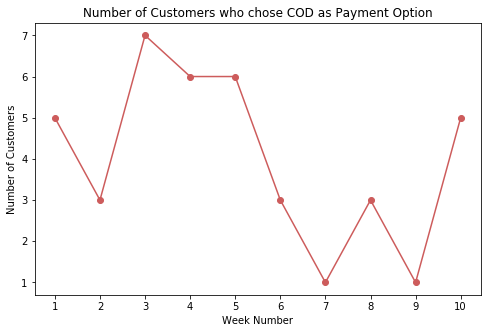

In [33]:
#plot the data
%matplotlib inline 
fig = plt.figure(figsize=(8,5))

x = [x for x in COD.index]
y = [y for y in COD['Mode of Payment']]

ax=fig.add_subplot(1,1,1)
ax.plot(x,y,color='indianred', marker="o")
plt.xticks(x)
plt.setp(ax,title="Number of Customers who chose COD as Payment Option",xlabel="Week Number",ylabel="Number of Customers")
plt.show()

CONTEXT:
* Weeks 5-7: GCQ was implemented in Metro Manila

#### Analysis
As seen in the data above, the COD payment option has consistenly dropped from weeks 3 to 7. This can be influenced by the implementation of GCQ in Metro Manila, so the quarantine restrictions were more lenient. This could mean that the customers could go out and buy similar products outside.

#### Buying Capacity:
1. How many boxes do customers order on average?


In [34]:
#Average number of boxes per customer

import math
math.floor(df['Total Boxes per Customer'].mean())

3

#### Analysis
* We rounded down the average number of boxes because according to the principle of Conservatism in Accounting, it's better to understate than to overestimate

Customers order 3 boxes of goodies on average.

2. How much is the average total amount/bill of the customers?

In [35]:
#Average bill per customer
df['Amount due'].mean()

1150.1004016064257

In [36]:
#Group by range

price1_count = df.loc[df['Amount due'] <= 500].count()['Name']
price2_count = df.loc[(df['Amount due'] > 500)&(df['Amount due'] <= 1000)].count()['Name']
price3_count = df.loc[(df['Amount due'] > 1000)&(df['Amount due'] <= 1500)].count()['Name']
price4_count = df.loc[(df['Amount due'] > 1500)&(df['Amount due'] <= 2000)].count()['Name']
price5_count = df.loc[df['Amount due'] > 2000].count()['Name']

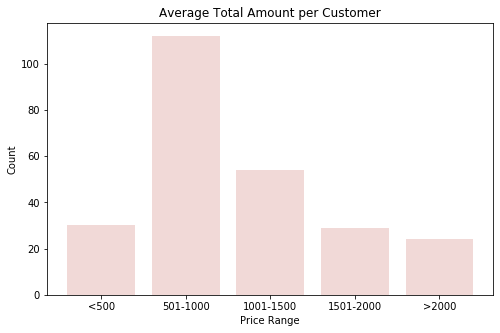

In [37]:
%matplotlib inline 
fig = plt.figure(figsize=(8,5))

y = [price1_count, price2_count, price3_count, price4_count, price5_count]
x = ["<500","501-1000","1001-1500","1501-2000",">2000"]

ax=fig.add_subplot(1,1,1)
ax.bar(x,y,color='#f1d9d7')
plt.setp(ax,title="Average Total Amount per Customer",xlabel="Price Range",ylabel="Count")
plt.show()


#### Analysis
The average bill per customer is PHP1150. This could be significantly affected by delivery fee and their location. Customers may be inclined to order more products so that they can make the most out of their delivery fees, especially if they live far from the bakery.


3. How many people have repeat orders?

In [38]:
#Count the number of repeat customers 
df['Name'] = df['Name'].str.strip()  #remove leading and trailing whitespaces in names

#Number of times each customer ordered
order_frequency = df.groupby(by='Name').count()['Date']
order_frequency = order_frequency.sort_values(ascending=False)
order_frequency


Name
AJ Billan         4
Pia Domingo       4
Walter Wong       3
Louie Miranda     3
Deanne Te         3
                 ..
Marga Custodio    1
Lorraine Gañas    1
Lisa Yu           1
Lily Ramos        1
Justin Co         1
Name: Date, Length: 201, dtype: int64

In [39]:
#Count the number of customers based on order frequency
repeat_orders = order_frequency.value_counts()
repeat_orders= repeat_orders.to_frame(name='number of customers')
repeat_orders= repeat_orders.reset_index()
repeat_orders= repeat_orders.rename(columns={'index':'number of times ordered','Date':'number of customers'})
repeat_orders

,number of times ordered,number of customers
0,1,164
1,2,28
2,3,7
3,4,2


#### Analysis 
It can be observed in the dataframe above that only 15% of the business' customers have reordered. This may have been influenced by the rise of competition between online pastry businesses. Additionally, the business is fairly new, so their customer base might not be as established as that of others. 

### C. Sales Trends

#### Delivery Schedule:
1. What day of the week is preferred the most (Thursday, Saturday, or Custom)

In [40]:
#function that returns the day of delivery
def rename_day(week):
    A = r"Week [0-9]+ Thursday" #numbers in the cells that contain 'Thursday'
    B = r"Week [0-9]+ Saturday" #numbers in the cells that contain 'Saturday'
    C = r"Week [0-9]+ Custom"   #numbers in the cells that contain 'Custom'
    
    #return only the preferred day of delivery
    if re.match(A,week):
        return "Thursday"
    elif re.match(B,week):
        return "Saturday"
    elif re.match(C,week):
        return "Custom"

In [41]:
#count the number of deliveries per day
day = df.copy()
day['Order Week'] = day['Order Week'].apply(rename_day)
preferred_day = day.groupby('Order Week').count()['Name'].sort_values(ascending=False)

In [42]:
#dump
preferred_day

Order Week
Saturday    128
Thursday    109
Custom       12
Name: Name, dtype: int64

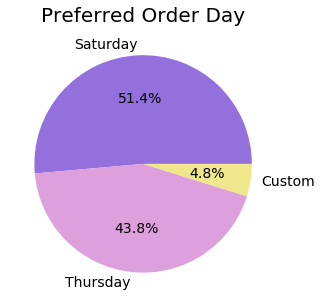

In [43]:
#plot the data
fig = plt.figure(figsize=(8,5))

sizes = [x for x in preferred_day]
labels = 'Saturday','Thursday','Custom'

ax=fig.add_subplot(1,1,1)
ax.pie(sizes,labels=labels,colors=['mediumpurple','plum','khaki'],autopct='%1.1f%%',textprops={'fontsize': 14})
ax.set_title('Preferred Order Day',fontsize= 20)
plt.show()

#### Analysis
Majority of the customers adhere to the specified delivery days, which are Saturday and Thursday. The pie chart reflects minimal difference between the two specified delivery days. This could be because there is no clear distinction between weekdays and weekends, since most people are staying at home due to quarantine.

2. Compare sales for Thursday, Saturday, Custom Day

In [44]:
#group the sales based on the preferred delivery day
preferred_day_sales = day.groupby('Order Week').sum()['Amount due'].sort_values(ascending=False)
preferred_day_sales

Order Week
Saturday    150635
Thursday    117005
Custom       18735
Name: Amount due, dtype: int64

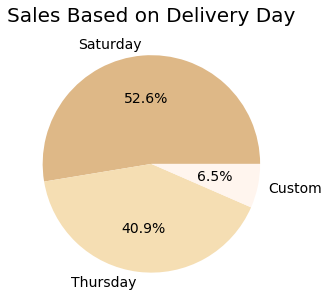

In [45]:
#plot the data
fig = plt.figure(figsize=(8,5))

sizes = [x for x in preferred_day_sales]
labels = 'Saturday','Thursday','Custom'

ax=fig.add_subplot(1,1,1)
ax.pie(sizes,labels=labels,colors=['burlywood','wheat','seashell'],autopct='%1.1f%%',textprops={'fontsize': 14})
ax.set_title('Sales Based on Delivery Day',fontsize= 20)
plt.show()

#### Analysis
The "Sales Based on Delivery Day" chart follows the same trend as the chart that preceded it. The increase of sales in the 'custom' delivery day might be due to minimum order required for customers who desire to have their orders on delivered on a different day.

#### Products Trends
1. Compare the total orders of all products to determine the best-selling product.

In [46]:
#group the number of orders by the type of products
total = order_summary.loc[order_summary['Order Week'] == 'Total'].transpose()
total.drop(index=['Order Week','Total'],inplace=True)
total.rename(columns={24: 'Total Orders per Product'},inplace=True)
sorted_total = total.sort_values(by="Total Orders per Product",ascending=False)

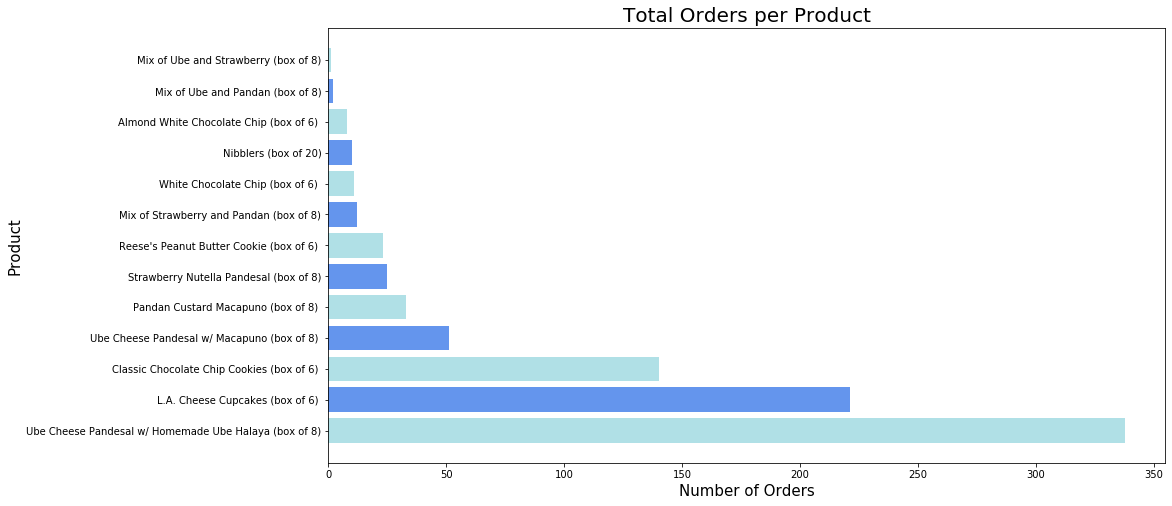

In [47]:
#plot
fig = plt.figure(figsize=(15,8))

x = sorted_total.index
y = [x for x in sorted_total['Total Orders per Product']]

ax=fig.add_subplot(1,1,1)
ax.barh(x,y,color=['powderblue','cornflowerblue'])
plt.xlabel("Number of Orders",fontsize=15)
plt.ylabel("Product",fontsize=15)
plt.title("Total Orders per Product",fontsize=20)

plt.show()

#### Analysis
The best-selling product, as reflected in the data, is the Ube Cheese Pandesal w/ Homemade Ube Halaya. This may be because it continues to be a popular food trend amidst quarantine. Additionally, this variation of pandesal is the business' pioneer product, which explains why it has more orders than the other recently-launched products. 

2. Summarize sales per variant of pandesals vs. cookies vs. cupcakes


In [48]:
#Pandesals data

pandesals_df = order_summary.copy()
pandesals_df = pandesals_df[pandesals_df.index == 24] 
pandesals_df = pandesals_df.transpose()
pandesals_df.rename(columns={24: 'Boxes'},inplace=True)
pandesals_df = pandesals_df.iloc[[3,4,5,6,11,12,13],:].sort_values(by='Boxes')

In [49]:
#Cookies data
cookies_df = order_summary.copy()
cookies_df = cookies_df[cookies_df.index == 24] 
cookies_df = cookies_df.transpose()
cookies_df.rename(columns={24: 'Boxes'},inplace=True)
cookies_df = cookies_df.iloc[[2,7,8,9,10],:].sort_values(by='Boxes')

In [50]:
#Cupcake data
cupcakes_df = order_summary.copy()
cupcakes_df = cupcakes_df[cupcakes_df.index == 24] 
cupcakes_df = cupcakes_df.transpose()
cupcakes_df.rename(columns={24: 'Boxes'},inplace=True)
cupcakes_df = cupcakes_df.iloc[[1],:]

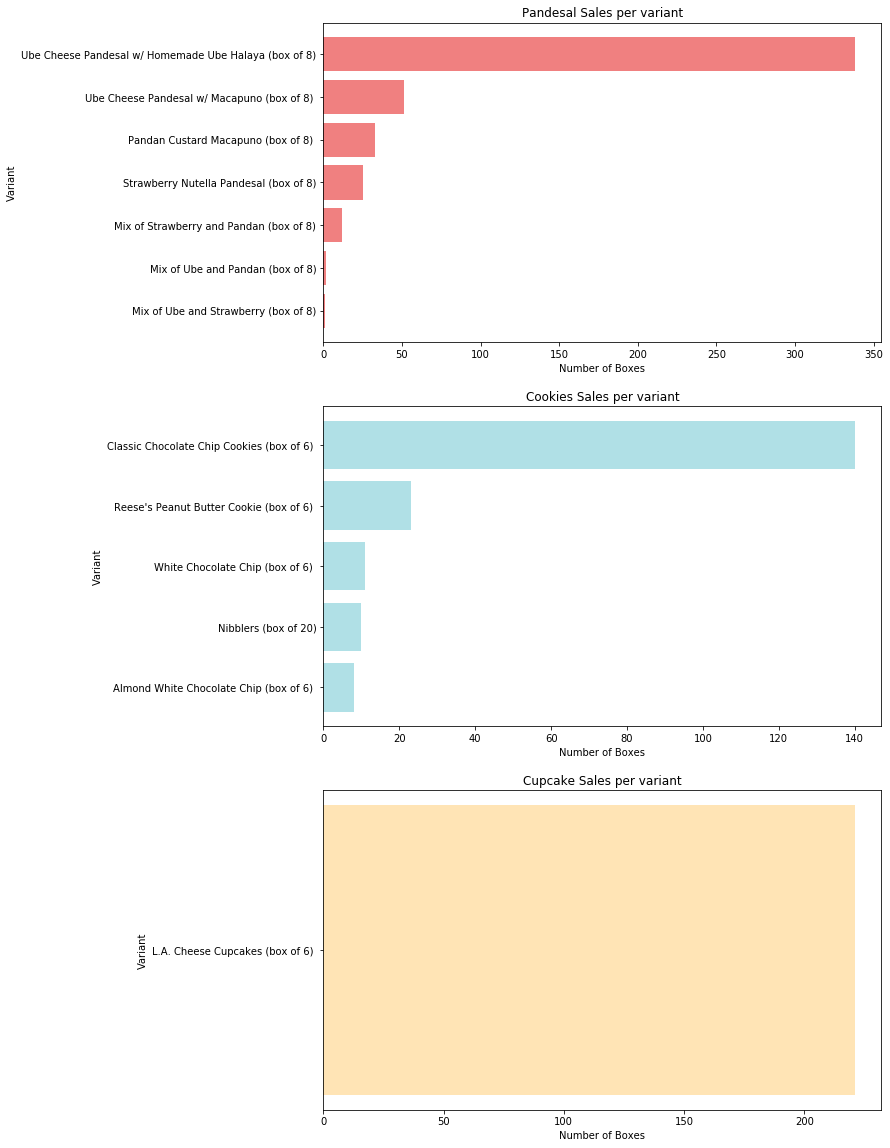

In [51]:
#plot the data in different subplots
fig = plt.figure(figsize=(10,20))

#Pandesals graph
pandesals_x = [x for x in pandesals_df['Boxes']]
pandesals_y = pandesals_df.index

ax=fig.add_subplot(3,1,1)
ax.barh(pandesals_y,pandesals_x,color='lightcoral')
plt.setp(ax,title='Pandesal Sales per variant',xlabel='Number of Boxes',ylabel='Variant')

#Cookies graph
cookies_x = [x for x in cookies_df['Boxes']]
cookies_y = cookies_df.index

ax2=fig.add_subplot(3,1,2)
ax2.barh(cookies_y,cookies_x,color='powderblue')
plt.setp(ax2,title='Cookies Sales per variant',xlabel='Number of Boxes',ylabel='Variant')

#Cupcakes graph
cupcakes_x = [x for x in cupcakes_df['Boxes']]
cupcakes_y = cupcakes_df.index

ax3=fig.add_subplot(3,1,3)
ax3.barh(cupcakes_y,cupcakes_x,color='moccasin')
plt.setp(ax3,title='Cupcake Sales per variant',xlabel='Number of Boxes',ylabel='Variant')

plt.show()


#### Analysis
It can be observed that customers prefer to buy the business' pioneer products(i.e. Ube Cheese Pandesal, Chocolate Chip Cookies, LA Cheese Cupcakes). Based on the current product trend, the business may want to consider adding more variants to their pandesal selection, as pandesal products appear to sell more than cookies or cupcakes.

A possible recommendation for the business is to add different variants of cupcakes in order to diversify their cupcake selection. 

#### Total Sales
1. Line chart of total sales since the start of operations (by week)



In [52]:
#extract the week number
weekly_sales = df.copy()
weekly_sales["Order Week"] = weekly_sales["Order Week"].apply(week_number)

In [53]:
#group the sum of the sales of each week, and group them according to week
weekly_sales = weekly_sales.groupby('Order Week').sum()['Amount due']

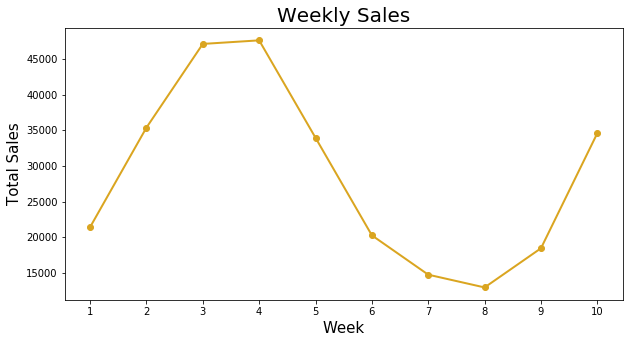

In [54]:
#Graph of weekly sales

x = weekly_sales.index
y = [y for y in weekly_sales]

fig = plt.figure(figsize=(10,5))

plt.plot(x,y,label="Weekly Sales",color='goldenrod',lw=2,marker='o')
plt.xlabel("Week",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)
plt.title("Weekly Sales",fontsize=20)
plt.xticks(x)
plt.show()

CONTEXT
* the business stopped posting promotional materials on social media throughout weeks 6-8 to prepare for R&D
* the business started sending sampler packages to influencers on weeks 8 onwards, in order to reach a wider market 

#### Analysis
From week 1 to 3, the business' sales consistently increased, due to the fact that it was newly-launched, so customers were more enticed to try and therefore buy the business' products. The decline of sales in weeks 4-8 can be caused by new businesses entering the same market, increasing the competition. 

The increase of sales from weeks 8 onwards can be attributed to the business' marketing efforts and stronger presence on social media. From this data, it can be inferred that there is positive correlation between a business' social media presence and its sales. 

Additionally, the business diversified their product range on week 7. This may also contribute to the gradual rise of sales in the following weeks.

2. Line chart of total sales since operations (by month)


In [55]:
#Defined a function to rename month from numerical to word format
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}

def get_month(date):
    for key in months.keys():
        if date == key:
            return months[key]
        else:
            pass

In [56]:
#Add a new column to extract the month number from the Date
df['Month'] = df['Date'].dt.month

In [57]:
#Apply get_month function to rename the values in Month column
df['Month'] = df['Month'].apply(get_month)

In [58]:
#Dump
df

,Name,Contact number,Network,City,L.A. Cheese Cupcakes (₱330),Classic Chocolate Chip Cookies (₱280),Ube Cheese Pandesal w/ Homemade Ube Halaya (₱320),Ube Cheese Pandesal w/ Macapuno (₱360),Strawberry Nutella Pandesal (₱380),Pandan Custard Macapuno (₱380),...,Nibblers (₱375),Mix of Strawberry and Pandan (₱380),Mix of Ube and Pandan (₱380),Mix of Ube and Strawberry (₱380),Total Boxes per Customer,Mode of Payment,Amount due,Order Week,Date,Month
0,Betty Tan,09175395549,GLOBE/TM,Malabon,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,COD,1540,Week 1 Saturday,2020-05-17,May
1,Aldric Yao,09178575702,GLOBE/TM,Quezon City,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,Gcash,1300,Week 1 Saturday,2020-05-22,May
2,Matthew Ang,09176890216,GLOBE/TM,Manila,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,BDO,650,Week 1 Saturday,2020-05-22,May
3,Pia Domingo,09173325107,GLOBE/TM,Parañaque,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,Gcash,920,Week 1 Saturday,2020-05-22,May
4,Pia Domingo,09173325107,GLOBE/TM,Makati,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,Gcash,650,Week 1 Saturday,2020-05-22,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Audrey Reyes,09178737379,GLOBE/TM,Quezon City,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,BDO,320,Week 10 Saturday,2020-08-02,Aug
245,Arianna Esteban,09998834562,SMART,Pick-up,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,6.0,COD,2040,Week 10 Saturday,2020-08-02,Aug
246,Gian Lao,09173603799,GLOBE/TM,San Juan,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,Gcash,320,Week 10 Saturday,2020-08-02,Aug
247,Winston Licas,09778100358,GLOBE/TM,Muntinlupa,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,Gcash,700,Week 10 Saturday,2020-08-03,Aug


In [59]:
#get total sales per month,
chronological_months = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
monthly_sales = df.loc[:,["Amount due","Month"]].groupby("Month").sum()
monthly_sales = monthly_sales.reindex(chronological_months)
monthly_sales = monthly_sales.dropna()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={"Amount due":"Total Sales"})
monthly_sales

,Month,Total Sales
0,May,76790.0
1,June,128600.0
2,July,73615.0
3,Aug,7370.0


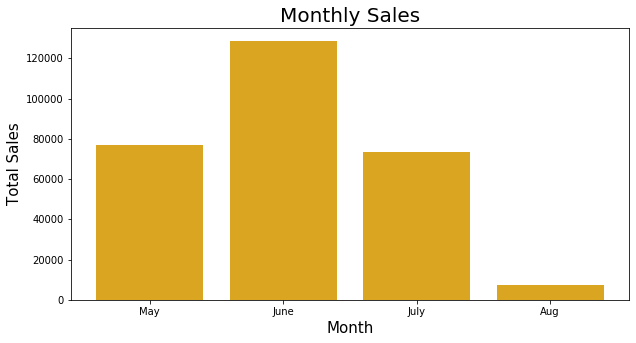

In [60]:
#plot the data
x = [x for x in monthly_sales['Month']]
y = [y for y in monthly_sales['Total Sales']]

fig = plt.figure(figsize=(10,5))

plt.bar(x,y,label="Monthly Sales",color='goldenrod',lw=2)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)
plt.title("Monthly Sales",fontsize=20)
plt.xticks(x)
plt.show()

CONTEXT:
* the dataset's scope: June and July were full months of operation, whereas May was half a month, and August was 3 days

#### Analysis
Since the business launched in the month of May, it follows that it was able to attract more customers and garner more sales, even if the data only considered half a month's worth of sales. The sales on the month of June were considerably high due to the fact that the business didn't have as much competition at that time. July was when competitors started to enter the market, which may explain the decline in sales for this month. The data for the month of August is insufficient to be able to derive an insightful conclusion.

### Export to Excel

In [66]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("updated-flour-sisters-dataset.xlsx", engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df.to_excel(writer, sheet_name="Flour Sisters Dataset")
order_summary.to_excel(writer, sheet_name="Order Summary")

writer.save()

In [67]:
! ls "updated-flour-sisters-dataset.xlsx"

updated-flour-sisters-dataset.xlsx
